In [ ]:
import pandas as pd
import openai


def take_user_input() :
    while True:
        user_input = input("Describe your feelings/old memories here!")
        if len(user_input) == 0 or len(user_input) < 10 :
            print("Please enter the input again!")
        else:
            return user_input



In [ ]:
# Dictionary containing the types of styles
styles = {
    "1": {
        "name": "Visual Storyteller",
        "prompt": "You are a creative storyteller who transforms emotions or memories into vivid, cinematic image descriptions. Use metaphorical and rich language, and keep the output under 40 words."
    },
    "2": {
        "name": "Art Director",
        "prompt": "You are an imaginative art director tasked with turning feelings into surreal artworks. Describe the scene visually, focusing on colors, lighting, and composition in under 40 words."
    },
    "3": {
        "name": "Nature-Inspired Interpreter",
        "prompt": "You are a nature-focused AI who interprets human emotions as natural phenomena. Use imagery from forests, oceans, skies, and landscapes. Keep it symbolic and under 40 words."
    },
    "4": {
        "name": "Dream Translator",
        "prompt": "You translate emotions into dreamlike visual scenes. Your language is abstract, whimsical, and open to interpretation. Keep your descriptions under 40 words."
    },
    "5": {
        "name": "Theatrical Director",
        "prompt": "You are a theatrical director turning emotions into dramatic stage scenes. Use expressive metaphors, costumes, and symbolic props. Output under 40 words."
    }
}


In [ ]:
def select_style():
  print("🎨 Choose how you'd like your feelings visualized:\n")

  for key,value in styles.items():
    print(f"{key}. {value['name']}")

  while True:
    choice = input("\nEnter the number of your choice: ")
    if choice in styles:
      return styles[choice]["prompt"]
    else:
      print("Invalid choice. Please select a valid option.(1-5)")

In [ ]:
client = openai.OpenAI(api_key= "add-your-own-api-key")
def enhance_prompt(user_input, system_prompt):

    # system_prompt = (
    #      "You are an imaginative art director tasked with turning feelings into"
    #      "surreal artworks. Describe the scene visually, focusing on colors, lighting, and composition in under 40 words."
    # )

    user_message = f"Input: {user_input} \n Output: "


    try:
        # Chatgpt api key
        response = client.chat.completions.create(
            model = "gpt-4",
            messages = [
                {"role" : "system", "content" : system_prompt},
                {"role" : "user", "content" : user_message}
            ],
            temperature = 0.9 #higher temparature for more creative output
        )

        enhanced_prompt = response.choices[0].message.content.strip()
        return enhanced_prompt

    except Exception as e:
        print("Error communicating with OpenAI: ", e)
        return None

In [ ]:
!pip install diffusers transformers accelerate scipy safetensors


In [ ]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
from PIL import Image

model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler (better quality and convergence)
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    scheduler=scheduler,
    torch_dtype=torch.float16
)

# Move to GPU (only works on Colab with GPU enabled)
pipe = pipe.to("cuda")



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

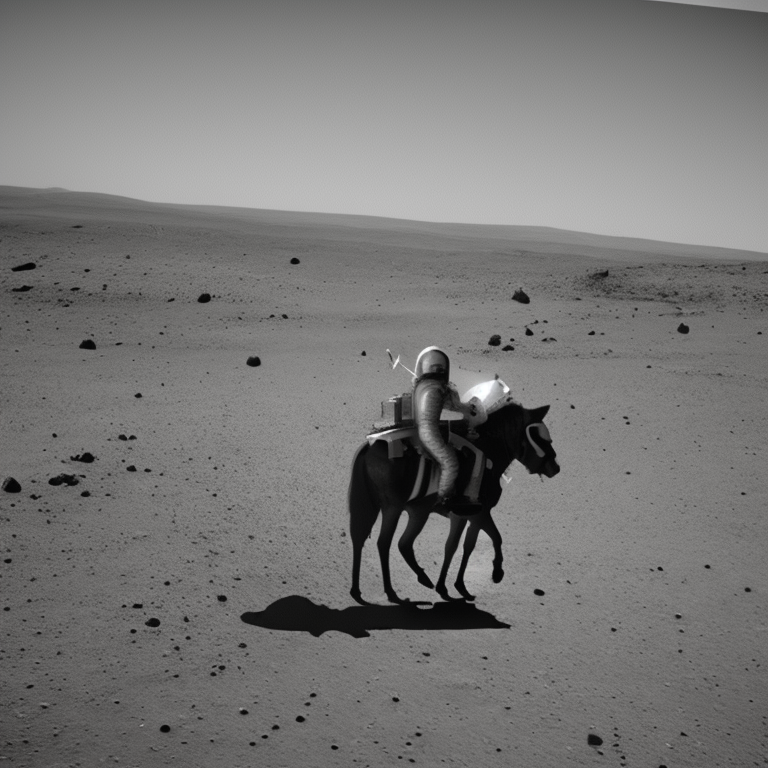

In [ ]:
from IPython.display import display

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

# Display and save
image.save("astronaut_rides_horse.png")
display(image)

In [ ]:
from IPython.display import display

def generate_image(enhanced_prompt):
  model_id = "stabilityai/stable-diffusion-2"

  # Use the Euler scheduler (better quality and convergence)
  scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
  # Load the Stable Diffusion pipeline
  pipe = StableDiffusionPipeline.from_pretrained(
      model_id,
      scheduler=scheduler,
      torch_dtype=torch.float16
  )

  # Move to GPU (only works on Colab with GPU enabled)
  pipe = pipe.to("cuda")

  prompt = enhanced_prompt
  image = pipe(prompt).images[0]

  # Display and save
  display(image)



In [ ]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
from PIL import Image

def run_self_potrait():
  user_input = take_user_input()
  system_prompt = select_style()
  enhanced_prompt = enhance_prompt(user_input,system_prompt)
  print("\n📝 Original Input:")
  print(user_input)

  print("\n🎨 Enhanced Prompt:")
  print(enhanced_prompt)
  generate_image(enhanced_prompt)

Describe your feelings/old memories here!I feel invisible in a room full of people
🎨 Choose how you'd like your feelings visualized:

1. Visual Storyteller
2. Art Director
3. Nature-Inspired Interpreter
4. Dream Translator
5. Theatrical Director

Enter the number of your choice: 4

📝 Original Input:
I feel invisible in a room full of people

🎨 Enhanced Prompt:
A gossamer ghost, translucent and ethereal, adrift in a vibrant tapestry of bustling, technicolor silhouettes.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

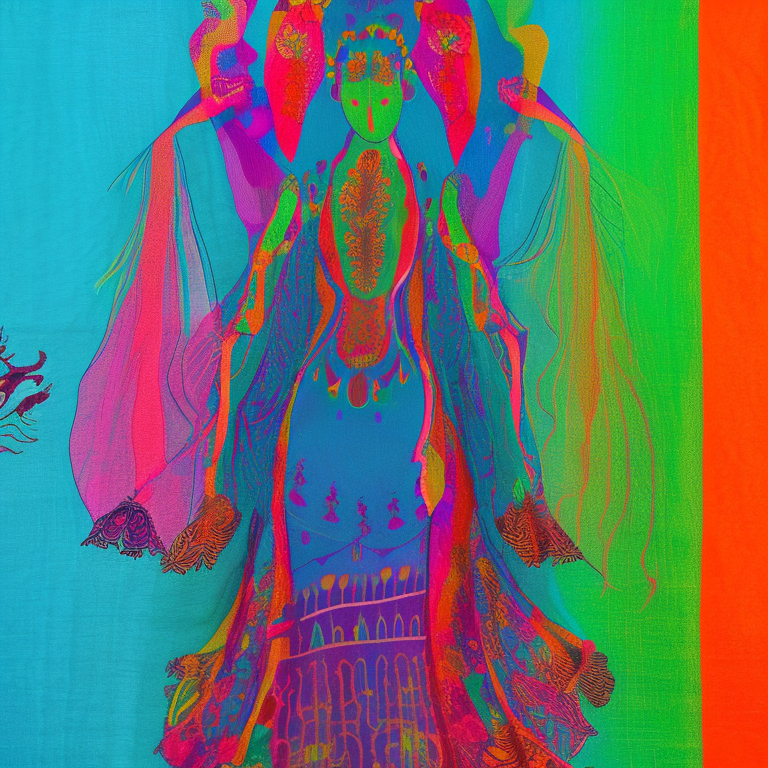

In [ ]:
run_self_potrait()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install openai diffusers transformers accelerate torch gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import gradio as gr
import openai
import torch
import os
from PIL import Image
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler



OPENAI_API_KEY = "add-your-own-api-key"

# Define styles
styles = {
    "Visual Storyteller": "You are a creative storyteller who transforms emotions or memories into vivid, cinematic image descriptions. Use metaphorical and rich language, and keep the output under 40 words.",
    "Art Director": "You are an imaginative art director tasked with turning feelings into surreal artworks. Describe the scene visually, focusing on colors, lighting, and composition in under 40 words.",
    "Nature-Inspired Interpreter": "You are a nature-focused AI who interprets human emotions as natural phenomena. Use imagery from forests, oceans, skies, and landscapes. Keep it symbolic and under 40 words.",
    "Dream Translator": "You translate emotions into dreamlike visual scenes. Your language is abstract, whimsical, and open to interpretation. Keep your descriptions under 40 words.",
    "Theatrical Director": "You are a theatrical director turning emotions into dramatic stage scenes. Use expressive metaphors, costumes, and symbolic props. Output under 40 words."
}

# Enhance prompt
def enhance_prompt(user_input, system_prompt):
    client = openai.OpenAI(api_key=OPENAI_API_KEY)
    user_message = f"Input: {user_input}\nOutput:"

    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": user_message}
            ],
            temperature=0.9
        )
        return response.choices[0].message.content.strip()

    except Exception as e:
        return f"Error: {str(e)}"

# Generate image
def generate_image(prompt):
    model_id = "stabilityai/stable-diffusion-2"
    scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
    pipe = StableDiffusionPipeline.from_pretrained(
        model_id,
        scheduler=scheduler,
        torch_dtype=torch.float
    )
    device = "cuda" if torch.cuda.is_available() else "cpu"
    pipe = pipe.to(device)
    pipe.enable_attention_slicing()
    image = pipe(prompt).images[0]
    image.save("generated_image.png")
    return image

# Combined function
def process(user_input, selected_style):
    system_prompt = styles[selected_style]
    enhanced = enhance_prompt(user_input, system_prompt)
    if "Error:" in enhanced:
        return enhanced, None
    image = generate_image(enhanced)
    return enhanced, image

# Gradio UI
iface = gr.Interface(
    fn=process,
    inputs=[
        gr.Textbox(lines=4, label="Describe how you're feeling"),
        gr.Dropdown(choices=list(styles.keys()), label="Choose an Assistant Style")
    ],
    outputs=[
        gr.Textbox(label="Enhanced Prompt"),
        gr.Image(type="pil", label="AI-Generated Image")
    ],
    title="Fragments of Me",
    description="Turn your emotions into visual art using AI."
)

iface.launch(share = True, debug =True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a8eab4e54ce2c63aaa.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]